In [2]:
import math
import numpy as np
import statistics
import random
pi = math.pi
import pandas as pd
import matplotlib as mpl
import scipy
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.ion()
#from matplotlib.legend_handler import HandlerTuple
#from matplotlib.legend_handler import HandlerLine2D
#from matplotlib.legend_handler import LandlerTuple
from matplotlib.colors import LogNorm
from scipy.optimize import curve_fit
from scipy import signal
import re

mpl.rcdefaults()
mpl.style.use('default')

# Comment tLis to not Lave latex plotsx

mpl.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})


/home/diego/.venv/lib/python3.12/site-packages/numpy/_core/getlimits.py:551: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


In [3]:
# pi+ z dependence HERMES 9066
df9066 = pd.read_csv('HERMESdata/9066.csv',sep=',', decimal = '.')

NN = 6
Q2_z_pp = df9066['Q2'][0:NN].mean()
x_z_pp = df9066['x'][0:NN].mean()
y_z_pp = df9066['y'][0:NN].mean()
meas_zp_z = df9066['z']
meas_zp_value = df9066['value']
meas_zp_dvalue = np.sqrt( df9066['stat_err_u']**2+df9066['sys_err_u']**2 )
print(np.sqrt(df9066['Q2']/df9066['x']/df9066['y']))
#print(Q2_z_pp)
#print(x_z_pp)
#print(y_z_pp)


0    6.871350
1    6.860665
2    6.848673
3    6.864065
4    6.896081
5    6.909598
6    6.940956
7    7.020346
8    7.080716
9    7.109333
dtype: float64


In [4]:
# pi+ x dependence HERMES 9055
df9055 = pd.read_csv('HERMESdata/9055.csv',sep=',', decimal = '.')

cut = 1
Q2_x_pp = df9055['Q2'][cut:].mean()
z_x_pp = df9055['z'][cut:].mean()
y_x_pp = df9055['y'][cut:].mean()
meas_xp_x = df9055['x']
meas_xp_value = df9055['value']
meas_xp_dvalue = np.sqrt(df9055['stat_err_u']**2+df9055['sys_err_u']**2 )
print(np.sqrt(df9055['Q2']/df9055['x']/df9055['y']))
#print(Q2_x_pp)
#print(z_x_pp)
#print(y_x_pp)


0    7.144553
1    7.186814
2    7.200985
3    7.173185
4    7.201343
5    7.179281
6    7.172334
dtype: float64


In [5]:
# pi- z dependence HERMES 10032
df10032 = pd.read_csv('HERMESdata/10032.csv',sep=',', decimal = '.')

NN = 6
Q2_z_pm = df10032['Q2'][0:NN].mean()
x_z_pm = df10032['x'][0:NN].mean()
y_z_pm = df10032['y'][0:NN].mean()
meas_zm_z = df10032['z']
meas_zm_value = df10032['value']
meas_zm_dvalue = np.sqrt(df10032['stat_err_u']**2 +df10032['sys_err_u']**2  )
#print(Q2_z_pm)
#print(x_z_pm)
#print(y_z_pm)

In [6]:
# pi- x dependence HERMES 10021
df10021 = pd.read_csv('HERMESdata/10021.csv',sep=',', decimal = '.')
cut = 1
Q2_x_pm = df10021['Q2'][cut:].mean()
z_x_pm = df10021['z'][cut:].mean()
y_x_pm = df10021['y'][cut:].mean()
meas_xm_x = df10021['x']
meas_xm_value = df10021['value']
meas_xm_dvalue = np.sqrt( df10021['stat_err_u']**2+df10021['sys_err_u']**2  )
#print(Q2_x_pm)
#print(z_x_pm)
#print(y_x_pm)

In [7]:
df = pd.read_csv('out/h1_test0.txt',header=None,sep=' ', decimal = '.')
x = df[0]
h1u = df[1]
h1d = df[2]


df = pd.read_csv('out/h1_test0.txt',header=None,sep=' ', decimal = '.')
xnew = df[0]
h1unew = df[1]
h1dnew = df[2]

xs = list()
h1us = list()
h1ds = list()

for k in range(2,456):
    name = 'out/h1_test' + str(k) + '.txt'
    df_temp = pd.read_csv(name,header=None,sep=' ', decimal = '.')
    xs.append( df_temp[0] )
    h1us.append( df_temp[1] )
    h1ds.append( df_temp[2] )

xs = sum(xs)/len(xs)
avg_h1u = sum(h1us)/len(h1us)

avg_h1d = sum(h1ds)/len(h1ds)


w = 5
h = 3

fs = 13
save = True


plt.figure(figsize=(w,h))
plt.hlines(0, 0, 1., color='k')
plt.plot(xs,xs*avg_h1u, color='b', label='u avg replicas')
plt.plot(xs,xs*avg_h1d, color='r', label='d avg replicas')
plt.plot(x,x*h1u,  color='k', label='u original "central" 0000',linestyle = 'dotted',linewidth=4)
plt.plot(x,x*h1d,  color='k',label='d original "central" 0000',linestyle = 'dotted',linewidth=4)
#plt.plot(xnew,xnew*h1unew,  color='k', label='u new central 0000',linestyle = 'dotted',linewidth=4)
#plt.plot(xnew,xnew*h1dnew,  color='k',label='d new central 0000',linestyle = 'dotted', linewidth=4)



plt.xlim(0,1.2)
plt.ylim(-0.1,0.6)
plt.legend(fancybox= True, framealpha=0., loc='best', fontsize = fs-3, ncol=1)
plt.xlabel("$x$",fontsize=fs)
plt.ylabel("$x\\,h_1(x)$",fontsize=fs)
#plt.text(0.1,0.6,"The averages over the 456\n replicas (solid lines) match the\n curves in the paper!\n The original 0000.dat IS NOT the mean",backgroundcolor='w',
#    bbox=dict(facecolor='white', edgecolor='red'))

plt.show()
# Htu = Htdb = Ht fav
# Htub = Htd = Ht unfav

FileNotFoundError: [Errno 2] No such file or directory: 'out/h1_test0.txt'

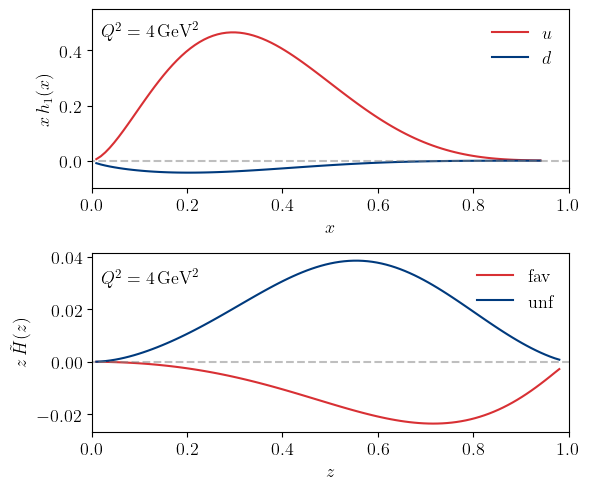

In [46]:
df = pd.read_csv('out/h1.txt',header=None,sep=' ', decimal = '.')
x = df[0]
h1u = df[1]
h1ub = df[2]
h1d = df[3]
h1db = df[4]

dff = pd.read_csv('out/Ht.txt',header=None,sep=' ', decimal = '.')
z = dff[0]
Htu = dff[1]
Htub = dff[2]
Htd = dff[3]
Htdb = dff[4]

mycmap=["#003a7d","#008dff","#2ac7bc","#c701ff","#4ecb8d","#ff9d3a","#8E5B19","#d83034"]


fs = 13
w = 6
h = 5



fig, axs = plt.subplots(2,1, figsize= (w,h), sharey = False)

#tl1 = '$s='+str(s) +'\\,\\rm{GeV}^2$\n'+'$y=' + str(y)+'$\n$z_h=' + str(zh[idx_zh]) + '$'
#tl2 = '$s='+str(s) +'\\,\\rm{GeV}^2$\n'+'$y=' + str(y)+'$\n$x_B=' + str(xB[idx_xB]) + '$'


axs[0].plot(x, x*h1u, color=mycmap[7],label='$u$')
axs[0].plot(x, x*h1d, color=mycmap[0],label='$d$')

axs[1].plot(z, z*Htu, color=mycmap[7],label='fav')
axs[1].plot(z, z*Htd, color=mycmap[0],label='unf')


axs[0].tick_params(axis='both', which='major', labelsize=fs) 
axs[1].tick_params(axis='both', which='major', labelsize=fs)  
#axs[1].tick_params(axis='both', which='minor', labelsize=12)  

axs[0].text(0.02,0.45,'$Q^2 = 4\\,\\rm{GeV}^2$',fontsize = fs)
axs[1].text(0.02,0.03,'$Q^2 = 4\\,\\rm{GeV}^2$',fontsize=fs)

axs[0].hlines(0.0, -1, 2, color='grey', linestyle='dashed', alpha=0.5)
axs[0].set_xlim(0,1)
axs[0].set_ylim(-0.1,0.55)
axs[0].set_xlabel('$x$', fontsize=fs)
axs[0].set_ylabel('$x\\,h_1(x)$', fontsize=fs)
axs[1].hlines(0.0, -1, 2, color='grey', linestyle='dashed', alpha=0.5)
axs[1].set_xlim(0,1)
axs[1].set_xlabel('$z$', fontsize=fs)
axs[1].set_ylabel('$z\\,\\tilde{H}(z)$', fontsize=fs)

axs[0].legend(fancybox= True, framealpha=0., loc='best', fontsize = fs, ncol=1)

axs[1].legend(fancybox= True, framealpha=0., loc='upper right', fontsize = fs, ncol=1)
plt.tight_layout()
plt.savefig('./out/h1Ht.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
#h1ds = list()
#h1us = list()
#
#for k in range(1,456):
#    name = 'LHAPfF_tables/JAM22-transversity_proton_lo/JAM22-transversity_proton_lo_' + str(k).zfill(4) + '.dat'
#    df_temp = pd.read_csv(name,skiprows=6, header=None,sep=' ', decimal = '.',skipfooter=1, engine='python')
#
#    h1ds.append( df_temp[0].dropna())
#    h1us.append( df_temp[1].dropna())
#
#d_replica0000 = sum(h1ds)/len(h1ds)
#u_replica0000 = sum(h1us)/len(h1us)
#
#with open("my0000.txt", "w") as f:
#    for l in range(0,len(d_replica0000)):
#         f.write("{:e}".format(d_replica0000[l]) + " " + "{:e}".format(u_replica0000[l]) + "\n")
#
##np.savetxt("d_replica0000.txt",d_replica0000,delimiter=",")
##np.savetxt("u_replica0000.txt",u_replica0000,delimiter=",")
#

In [ ]:
#h1ds = list()
#h1us = list()
#h1dbs = list()
#h1ubs = list()
#h1ss = list()
#h1sbs = list()
#
#for k in range(0,262):
#    name = 'LHAPDF_tables/JAM23-transversity_proton_lo/JAM23-transversity_proton_lo_' + str(k).zfill(4) + '.dat'
#    df_temp = pd.read_csv(name,skiprows=6, header=None,sep=' ', decimal = '.',skipfooter=1, engine='python')
#
#    h1ds.append( df_temp[0].dropna())
#    h1us.append( df_temp[1].dropna())
#    h1ss.append( df_temp[2].dropna())
#    h1dbs.append( df_temp[3].dropna())
#    h1ubs.append( df_temp[4].dropna())
#    h1sbs.append( df_temp[5].dropna())
#    
#
#d_0000 = sum(h1ds)/len(h1ds)
#u_0000 = sum(h1us)/len(h1us)
#db_0000 = sum(h1dbs)/len(h1dbs)
#ub_0000 = sum(h1ubs)/len(h1ubs)
#s_0000 = sum(h1ss)/len(h1ss)
#sb_0000 = sum(h1sbs)/len(h1sbs)
#
#with open("myh1PDF_0000.dat", "w") as f:
#    for l in range(0,len(d_0000)):
#         f.write("{:e}".format(d_0000[l]) + " " + "{:e}".format(u_0000[l]) +" " + "{:e}".format(s_0000[l]) + " "+"{:e}".format(db_0000[l]) + " "
#                 +"{:e}".format(ub_0000[l]) + " "+"{:e}".format(sb_0000[l]) + "\n")
#
#

In [ ]:
#Dus  = list()
#Dubs = list()
#Dds  = list()
#Ddbs = list()
#Dcs  = list()
#Dcbs = list()
#Dss  = list()
#Dsbs = list()
#Dbs  = list()
#Dbbs = list()
#Dgs = list()
#
#for k in range(1,1056):
#    name = 'LHAPDF_tables/JAM22-FF_pion_nlo/JAM22-FF_pion_nlo_' + str(k).zfill(4) + '.dat'
#    df_temp = pd.read_csv(name,skiprows=6, header=None,sep=' ', decimal = '.',skipfooter=1, engine='python')
#
#
#    Dus.append( df_temp[6].dropna())
#    Dubs.append( df_temp[3].dropna())
#    Dds.append( df_temp[5].dropna())
#    Ddbs.append( df_temp[4].dropna())
#    Dcs.append( df_temp[8].dropna())
#    Dcbs.append( df_temp[1].dropna())
#    Dss.append( df_temp[7].dropna())
#    Dsbs.append( df_temp[2].dropna())
#    Dbs.append( df_temp[9].dropna())
#    Dbbs.append( df_temp[0].dropna())
#    Dgs.append( df_temp[10].dropna())
#
#
#
#Du_0000     = sum(Dus)/len(Dus)
#Dub_0000   = sum(Dubs)/len(Dubs)
#Dd_0000   = sum(Dds)/len(Dds)
#Ddb_0000   = sum(Ddbs)/len(Ddbs)
#Dc_0000   = sum(Dcs)/len(Dcs)
#Dcb_0000   = sum(Dcbs)/len(Dcbs)
#Ds_0000   = sum(Dss)/len(Dss)
#Dsb_0000   = sum(Dsbs)/len(Dsbs)
#Db_0000   = sum(Dbs)/len(Dbs)
#Dbb_0000   = sum(Dbbs)/len(Dbbs)
#Dg_0000   = sum(Dgs)/len(Dgs)
#with open("myD1FF_0000.dat", "w") as f:
#    for l in range(0,len(Du_0000 )):
#         f.write("{:e}".format(Dbb_0000[l]) + " " + "{:e}".format(Dcb_0000[l]) + " " + "{:e}".format(Dsb_0000[l]) + " " + "{:e}".format(Dub_0000[l]) 
#                 + " " + "{:e}".format(Ddb_0000[l]) + " " + "{:e}".format(Dd_0000[l]) + " " + "{:e}".format(Du_0000[l]) + " " + "{:e}".format(Ds_0000[l]) 
#                 + " " + "{:e}".format(Dc_0000[l]) + " " + "{:e}".format(Db_0000[l]) + " " + "{:e}".format(Dg_0000[l]) +"\n")
#
#

In [ ]:
#fus  = list()
#fubs = list()
#fds  = list()
#fdbs = list()
#fcs  = list()
#fcbs = list()
#fss  = list()
#fsbs = list()
#fbs  = list()
#fbbs = list()
#fgs = list()
#
#for k in range(1,1008):
#    name = 'LHAPDF_tables/JAM22-PDF_proton_nlo/JAM22-PDF_proton_nlo_' + str(k).zfill(4) + '.dat'
#    df_temp = pd.read_csv(name,skiprows=6, header=None,sep=' ', decimal = '.',skipfooter=1, engine='python')
#
#
#    fus.append( df_temp[6].dropna())
#    fubs.append( df_temp[3].dropna())
#    fds.append( df_temp[5].dropna())
#    fdbs.append( df_temp[4].dropna())
#    fcs.append( df_temp[8].dropna())
#    fcbs.append( df_temp[1].dropna())
#    fss.append( df_temp[7].dropna())
#    fsbs.append( df_temp[2].dropna())
#    fbs.append( df_temp[9].dropna())
#    fbbs.append( df_temp[0].dropna())
#    fgs.append( df_temp[10].dropna())
#
#
#fu_0000     = sum(fus)/len(fus)
#fub_0000   = sum(fubs)/len(fubs)
#fd_0000   = sum(fds)/len(fds)
#fdb_0000   = sum(fdbs)/len(fdbs)
#fc_0000   = sum(fcs)/len(fcs)
#fcb_0000   = sum(fcbs)/len(fcbs)
#fs_0000   = sum(fss)/len(fss)
#fsb_0000   = sum(fsbs)/len(fsbs)
#fb_0000   = sum(fbs)/len(fbs)
#fbb_0000   = sum(fbbs)/len(fbbs)
#fg_0000   = sum(fgs)/len(fgs)
#with open("myf1PDF_0000.dat", "w") as f:
#    for l in range(0,len(fu_0000 )):
#         f.write("{:e}".format(fbb_0000[l]) + " " + "{:e}".format(fcb_0000[l]) + " " + "{:e}".format(fsb_0000[l]) + " " + "{:e}".format(fub_0000[l]) 
#                 + " " + "{:e}".format(fdb_0000[l]) + " " + "{:e}".format(fd_0000[l]) + " " + "{:e}".format(fu_0000[l]) + " " + "{:e}".format(fs_0000[l]) 
#                 + " " + "{:e}".format(fc_0000[l]) + " " + "{:e}".format(fb_0000[l]) + " " + "{:e}".format(fg_0000[l]) +"\n")
#
#

In [ ]:
df = pd.read_csv('out/Ht_test0.txt',header=None,sep=' ', decimal = '.')
z = df[0]
Htu = df[1]
Htub = df[2]
Htd = df[3]
Htdb = df[4]


zs = list()
Htus = list()
Htubars = list()
Htds = list()
Htdbars = list()

for k in range(1,465):
    name = 'out/Ht_test' + str(k) + '.txt'
    df_temp = pd.read_csv(name,header=None,sep=' ', decimal = '.')
    zs.append( df_temp[0] )
    Htus.append( df_temp[1] )
    Htubars.append( df_temp[2] )
    Htds.append( df_temp[3] )
    Htdbars.append( df_temp[4] )

zs = sum(zs)/len(zs)
avg_Htu = sum(Htus)/len(Htus)
avg_Htubar = sum(Htubars)/len(Htubars)
avg_Htd = sum(Htds)/len(Htds)
avg_Htdbar = sum(Htdbars)/len(Htdbars)


w = 5
h = 3

fs = 13
save = True


plt.figure(figsize=(w,h))
plt.hlines(0, 0, 1., color='k')
plt.plot(zs,zs*avg_Htu, color='b', label='u avg replicas')
plt.plot(zs,zs*avg_Htubar, color='r', label='d avg replicas')
plt.plot(z,z*Htu,  color='k', label='u central 0000',linestyle = 'dashed')
plt.plot(z,z*Htub,  color='k',label='d central 0000',linestyle = 'dashed')

plt.xlim(0,1.2)
plt.ylim(-0.1,0.1)
plt.legend(fancybox= True, framealpha=0., loc='best', fontsize = fs-3, ncol=1)
plt.xlabel("$x$",fontsize=fs)
plt.ylabel("$x\\,h_1(x)$",fontsize=fs)
plt.text(0.7,0.05,"The averages over the 465\n replicas (solid lines) match the\n curves in the paper!\n The original 0000.dat is the mean",backgroundcolor='w')

plt.show()
# Htu = Htdb = Ht fav
# Htub = Htd = Ht unfav

FileNotFoundError: [Errno 2] No such file or directory: 'out/Ht_test0.txt'

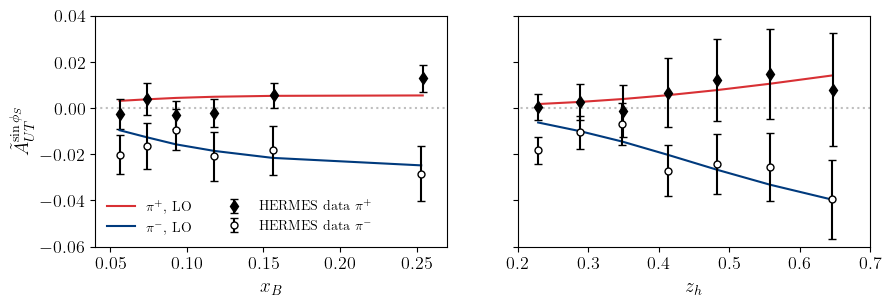

In [12]:
dfxp = pd.read_csv('out/AUTx_LO_pp.txt',header=None,sep=' ', decimal = '.',skiprows = 1,engine='python')
dfxm = pd.read_csv('out/AUTx_LO_pm.txt',header=None,sep=' ', decimal = '.',skiprows = 1,engine='python')
dfzp = pd.read_csv('out/AUTz_LO_pp.txt',header=None,sep=' ', decimal = '.',skipfooter=3,engine='python')
dfzm = pd.read_csv('out/AUTz_LO_pm.txt',header=None,sep=' ', decimal = '.',skipfooter=3,engine='python')

mycmap=["#003a7d","#008dff","#ff73b6","#c701ff","#4ecb8d","#ff9d3a","#f9e858","#d83034"]


fs = 13
w = 10
h = 3



fig, axs = plt.subplots(1,2, figsize= (w,h), sharey = True)

#tl1 = '$s='+str(s) +'\\,\\rm{GeV}^2$\n'+'$y=' + str(y)+'$\n$z_h=' + str(zh[idx_zh]) + '$'
#tl2 = '$s='+str(s) +'\\,\\rm{GeV}^2$\n'+'$y=' + str(y)+'$\n$x_B=' + str(xB[idx_xB]) + '$'


axs[0].plot(dfxp[0], dfxp[4], color=mycmap[7],label='$\\pi^+$, LO')
axs[0].errorbar(meas_xp_x,meas_xp_value,meas_xp_dvalue, linestyle='none',fmt='d',mfc="k",mec='k',ecolor='k',ms=6, capsize=3, label='HERMES data $\\pi^+$')
axs[0].errorbar(meas_xp_x[0],meas_xp_value[0],meas_xp_dvalue[0], linestyle='none',fmt='d',mfc='lightgrey',mec='k',ecolor='k',ms=6, capsize=3)

axs[0].plot(dfxm[0], dfxm[4], color=mycmap[0],label='$\\pi^-$, LO')
axs[0].errorbar(meas_xm_x,meas_xm_value,meas_xm_dvalue, linestyle='none',fmt='o',mfc='w',mec='k',ecolor='k',ms=5, capsize=3,label='HERMES data $\\pi^-$')
axs[0].errorbar(meas_xm_x[0],meas_xm_value[0],meas_xm_dvalue[0], linestyle='none',fmt='o',mfc='lightgrey',mec='k',ecolor='k',ms=5, capsize=3)

axs[0].set_xlabel('$x_B$', fontsize=14)
axs[0].set_ylabel('$$\\tilde{A}_{UT}^{\\sin \\phi_S }$$', fontsize=14)
axs[0].set_ylabel('$$\\tilde{A}_{UT}^{\\sin \\phi_S }$$', fontsize=14)

axs[0].tick_params(axis='both', which='minor', labelsize=12)       
axs[0].tick_params(axis='both', which='minor', labelsize=12)  

axs[1].plot(dfzp[2], dfzp[4], color=mycmap[7],label='$\\pi^+$, LO')
axs[1].errorbar(meas_zp_z,meas_zp_value,meas_zp_dvalue, linestyle='none',fmt='d',mfc='k',mec='k',ecolor='k',ms=6, capsize=3)
#axs[1].errorbar(meas_zp_z[7:10],meas_zp_value[7:10],meas_zp_dvalue[7:10], linestyle='none',fmt='d',mfc='lightgrey',mec='k',ecolor='k',ms=6, capsize=3)



axs[1].plot(dfzm[2], dfzm[4], color=mycmap[0],label='$\\pi^-$, LO')
axs[1].errorbar(meas_zm_z,meas_zm_value,meas_zm_dvalue, linestyle='none',fmt='o',mfc='w',mec='k',ecolor='k',ms=5, capsize=3)
#axs[1].errorbar(meas_zm_z[7:10],meas_zm_value[7:10],meas_zm_dvalue[7:10], linestyle='none',fmt='o',mfc='lightgrey',mec='k',ecolor='k',ms=5, capsize=3)


#axs[1].vlines(0.7, -0.2,+0.2, color='grey', linestyle='dashed', alpha=0.5)
#axs[1].vlines(0.2, -0.2,+0.2, color='grey', linestyle='dashed', alpha=0.5)

axs[0].set_xlim(0.04 ,0.27)
axs[0].set_ylim(-0.045,0.04)
axs[1].set_xlim(0.2 ,0.7)
axs[1].set_ylim(-0.06,0.04)
axs[1].set_xlabel('$z_h$', fontsize=14)

axs[0].set_xlabel('$x_B$', fontsize=14)
#axs[1].set_ylabel('$$A_{UT}^{\\sin \\phi_S }$$', fontsize=14)


#axs[0].tick_params(axis='both', which='minor', labelsize=fs)       
#axs[1].tick_params(axis='both', which='minor', labelsize=fs)  
axs[0].hlines(0.0, 0,1, color='grey',alpha=0.5,linestyle='dotted', zorder=-100)
axs[1].hlines(0.0, 0,1, color='grey',alpha=0.5,linestyle='dotted', zorder=-100)

#axs[0].grid(True)

axs[0].tick_params(axis='both', which='major', labelsize=fs) 
axs[1].tick_params(axis='both', which='major', labelsize=fs)  
#axs[1].tick_params(axis='both', which='minor', labelsize=12)  

#axs[0].text(0.05,0.008,tl1)
#axs[1].text(0.05,0.008,tl2)

axs[0].legend(fancybox= True, framealpha=0., loc='best', fontsize = fs-3, ncol=2)
#axs[1,0].legend(fancybox= True, framealpha=0., loc='best', fontsize = fs-3, ncol=1)
#axs[1].legend(fancybox= True, framealpha=0., loc='best', fontsize = fs, ncol=1)
#axs[1,1].legend(fancybox= True, framealpha=0., loc='best', fontsize = fs-3, ncol=1)
#plt.tight_layout()
plt.savefig('./out/A_UT_LO.pdf', dpi=300, bbox_inches='tight')
plt.show()

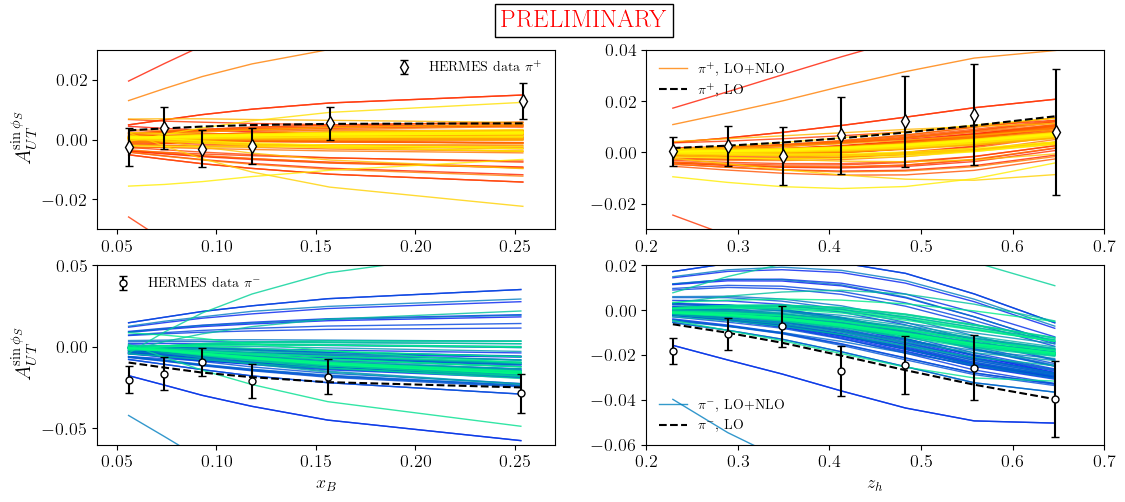

In [ ]:
N_start = 1
N_scenario = 100

dfxpNLO= list()
dfxmNLO= list()
dfzpNLO= list()
dfzmNLO= list()


for k in range(N_start,N_start+N_scenario):

    fnamexp = 'out/run'+str(k)+'/AUTx_NLO_pp.txt'
    fnamexm = 'out/run'+str(k)+'/AUTx_NLO_pm.txt'
    fnamezp = 'out/run'+str(k)+'/AUTz_NLO_pp.txt'
    fnamezm = 'out/run'+str(k)+'/AUTz_NLO_pm.txt'

    dfxpNLO.append(pd.read_csv(fnamexp,header=None,sep=' ', decimal = '.',engine='python',skiprows = 1))
    dfxmNLO.append(pd.read_csv(fnamexm,header=None,sep=' ', decimal = '.',engine='python',skiprows = 1))
    dfzpNLO.append(pd.read_csv(fnamezp,header=None,sep=' ', decimal = '.',engine='python',skipfooter = 3))
    dfzmNLO.append(pd.read_csv(fnamezm,header=None,sep=' ', decimal = '.',engine='python',skipfooter = 3))
    
cm_red = plt.get_cmap('autumn',N_scenario)
cm_blue = plt.get_cmap('winter',N_scenario)


dfxp = pd.read_csv('out/AUTx_LO_pp.txt',header=None,sep=' ', decimal = '.',engine='python',skiprows = 1)
dfxm = pd.read_csv('out/AUTx_LO_pm.txt',header=None,sep=' ', decimal = '.',engine='python',skiprows = 1)
dfzp = pd.read_csv('out/AUTz_LO_pp.txt',header=None,sep=' ', decimal = '.',engine='python',skipfooter = 3)
dfzm = pd.read_csv('out/AUTz_LO_pm.txt',header=None,sep=' ', decimal = '.',engine='python',skipfooter = 3)



fs = 13
w = 13
h = 5


fig, axs = plt.subplots(2,2, figsize= (w,h))

#tl1 = '$s='+str(s) +'\\,\\rm{GeV}^2$\n'+'$y=' + str(y)+'$\n$z_h=' + str(zh[idx_zh]) + '$'
#tl2 = '$s='+str(s) +'\\,\\rm{GeV}^2$\n'+'$y=' + str(y)+'$\n$x_B=' + str(xB[idx_xB]) + '$'

# First plot: A_UT vs xB at fixed zh

fig.suptitle("PRELIMINARY",color='r', fontsize=fs+5, bbox=dict(facecolor='w', edgecolor='k'))
fig.subplots_adjust(top=.9) 

for k in range(0,N_scenario-1):
    axs[0,0].plot(dfxpNLO[k][0], dfxpNLO[k][5], color =cm_red(k/N_scenario),linestyle='solid',linewidth=1,alpha=0.8)
axs[0,0].plot(dfxp[0], dfxp[4], color='k',linestyle='dashed')
axs[0,0].errorbar(meas_xp_x,meas_xp_value,meas_xp_dvalue, linestyle='none',fmt='d',mfc='w',mec='k',ecolor='k',ms=7, capsize=3, label='HERMES data $\\pi^+$')

for k in range(0,N_scenario -1):
    axs[1,0].plot(dfxmNLO[k][0], dfxmNLO[k][5], color =cm_blue(k/N_scenario) ,linestyle='solid',linewidth=1,alpha=0.8)
axs[1,0].plot(dfxm[0], dfxm[5], color='k',linestyle='dashed')
axs[1,0].errorbar(meas_xm_x,meas_xm_value,meas_xm_dvalue, linestyle='none',fmt='o',mfc='w',mec='k',ecolor='k',ms=5, capsize=3,label='HERMES data $\\pi^-$')

axs[0,0].set_xlabel('$x_B$', fontsize=fs)
axs[0,0].set_ylabel('$$A_{UT}^{\\sin \\phi_S }$$', fontsize=fs+2)
axs[1,0].set_ylabel('$$A_{UT}^{\\sin \\phi_S }$$', fontsize=fs+2)

# Second plot: A_UT vs zh at fixed xB

axs[0,1].plot(dfzpNLO[0][2], dfzpNLO[0][5], color =cm_red(.5) ,linestyle='solid',label='$\\pi^+$, LO+NLO',linewidth=1,alpha=0.8)
for k in range(1,N_scenario-1):
    axs[0,1].plot(dfzpNLO[k][2], dfzpNLO[k][5], color =cm_red(k/N_scenario) ,linestyle='solid',linewidth=1,alpha=0.8)
axs[0,1].plot(dfzp[2], dfzp[5], color='k',label='$\\pi^+$, LO',linestyle='dashed')
axs[0,1].errorbar(meas_zp_z,meas_zp_value,meas_zp_dvalue, linestyle='none',fmt='d',mfc='w',mec='k',ecolor='k',ms=7, capsize=3)

axs[1,1].plot(dfzmNLO[0][2], dfzmNLO[0][5], color =cm_blue(.5) ,linestyle='solid',label='$\\pi^-$, LO+NLO',linewidth=1,alpha=0.8)
for k in range(1,N_scenario-1):
    axs[1,1].plot(dfzmNLO[k][2], dfzmNLO[k][5], color =cm_blue(k/N_scenario) ,linestyle='solid',linewidth=1,alpha=0.8)
axs[1,1].plot(dfzm[2], dfzm[5], color='k',label='$\\pi^-$, LO',linestyle='dashed')
axs[1,1].errorbar(meas_zm_z,meas_zm_value,meas_zm_dvalue, linestyle='none',fmt='o',mfc='w',mec='k',ecolor='k',ms=5, capsize=3)

axs[0,0].set_xlim(0.04 ,0.27)
axs[0,0].set_ylim(-0.03,0.03)
axs[1,0].set_xlim(0.04 ,0.27)
axs[1,0].set_ylim(-0.06,0.05)
axs[0,1].set_xlim(0.2 ,.7)
axs[0,1].set_ylim(-0.03,0.04)
axs[1,1].set_xlim(0.2 ,.7)
axs[1,1].set_ylim(-0.06,0.02)

axs[0,0].tick_params(axis='both', which='major', labelsize=fs) 
axs[1,0].tick_params(axis='both', which='major', labelsize=fs)  

axs[0,1].tick_params(axis='both', which='major', labelsize=fs)       
axs[1,1].tick_params(axis='both', which='major', labelsize=fs)  

axs[1,1].set_xlabel('$z_h$', fontsize=fs)

axs[1,0].set_xlabel('$x_B$', fontsize=fs)

axs[0,0].legend(fancybox= True, framealpha=0., loc='best', fontsize = fs-3, ncol=1)
axs[1,0].legend(fancybox= True, framealpha=0., loc='best', fontsize = fs-3, ncol=1)
axs[0,1].legend(fancybox= True, framealpha=0., loc='best', fontsize = fs-3, ncol=1)
axs[1,1].legend(fancybox= True, framealpha=0., loc='best', fontsize = fs-3, ncol=1)


plt.savefig('./out/HERMES_A_UT_NLO.pdf', dpi=300, bbox_inches='tight')
plt.show() 

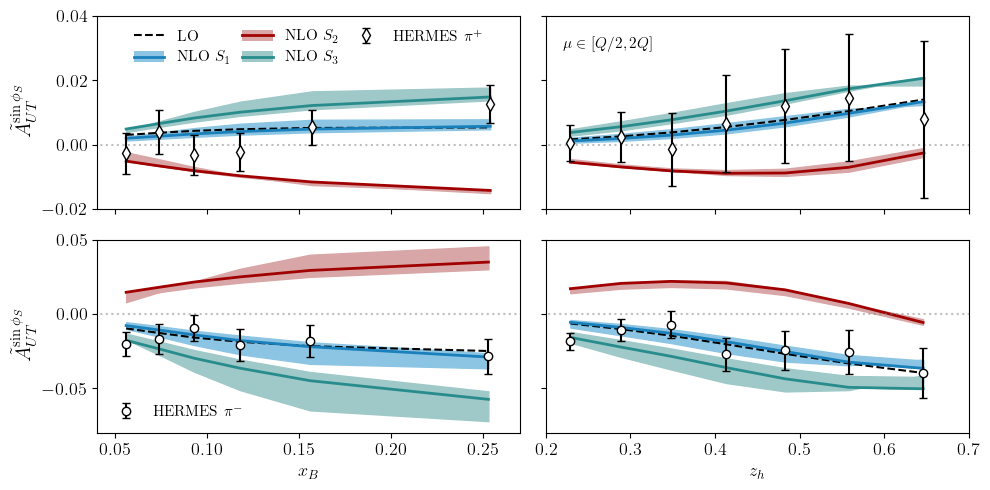

In [8]:
ids = [1,2,3]

dfxpNLO= list()
dfxmNLO= list()
dfzpNLO= list()
dfzmNLO= list()





#mycmap=["#003a7d","#008dff","#8acbff","#c701ff","#4ecb8d","#ff9d3a","#e08e8f","#d83034"]

mycmap=["#8cc5e3","#1a80bb","#d8a6a6","#a00000","#9fc8c8","#298c8c"]

for k in ids:

    fnamexp = 'out/run'+str(k)+'/AUTx_NLO_pp.txt'
    fnamexm = 'out/run'+str(k)+'/AUTx_NLO_pm.txt'
    fnamezp = 'out/run'+str(k)+'/AUTz_NLO_pp.txt'
    fnamezm = 'out/run'+str(k)+'/AUTz_NLO_pm.txt'

    dfxpNLO.append(pd.read_csv(fnamexp,header=None,sep=' ', decimal = '.',engine='python',skiprows = 1))
    dfxmNLO.append(pd.read_csv(fnamexm,header=None,sep=' ', decimal = '.',engine='python',skiprows = 1))
    dfzpNLO.append(pd.read_csv(fnamezp,header=None,sep=' ', decimal = '.',engine='python',skipfooter = 3))
    dfzmNLO.append(pd.read_csv(fnamezm,header=None,sep=' ', decimal = '.',engine='python',skipfooter = 3))


    


dfxp = pd.read_csv('out/AUTx_LO_pp.txt',header=None,sep=' ', decimal = '.',engine='python',skiprows = 1)
dfxm = pd.read_csv('out/AUTx_LO_pm.txt',header=None,sep=' ', decimal = '.',engine='python',skiprows = 1)
dfzp = pd.read_csv('out/AUTz_LO_pp.txt',header=None,sep=' ', decimal = '.',engine='python',skipfooter = 3)
dfzm = pd.read_csv('out/AUTz_LO_pm.txt',header=None,sep=' ', decimal = '.',engine='python',skipfooter = 3)



fs = 13
w = 10
h = 5


fig, axs = plt.subplots(2,2, figsize= (w,h),sharey='row',sharex='col')

#tl1 = '$s='+str(s) +'\\,\\rm{GeV}^2$\n'+'$y=' + str(y)+'$\n$z_h=' + str(zh[idx_zh]) + '$'
#tl2 = '$s='+str(s) +'\\,\\rm{GeV}^2$\n'+'$y=' + str(y)+'$\n$x_B=' + str(xB[idx_xB]) + '$'


#fig.suptitle("PRELIMINARY",color='r', fontsize=fs+5, bbox=dict(facecolor='w', edgecolor='k'))
#fig.subplots_adjust(top=.9) 

# xp

l1 =axs[0,0].plot(dfxp[0], dfxp[4], color='k',linestyle='dashed',zorder=90)
l2=axs[0,0].plot(dfxpNLO[0][0], dfxpNLO[0][4], color =mycmap[1],linestyle='solid',linewidth=2,alpha=1,zorder=100)
l2shade=axs[0,0].fill_between(dfxpNLO[0][0], dfxpNLO[0][4],dfxpNLO[0][5],color =mycmap[0],alpha=1)
axs[0,0].fill_between(dfxpNLO[0][0], dfxpNLO[0][4],dfxpNLO[0][6],color =mycmap[0],alpha=1)

l3=axs[0,0].plot(dfxpNLO[1][0], dfxpNLO[1][4], color =mycmap[3],linestyle='solid',linewidth=2,alpha=1)
l3shade=axs[0,0].fill_between(dfxpNLO[1][0], dfxpNLO[1][4],dfxpNLO[1][5],color =mycmap[2],alpha=1)
axs[0,0].fill_between(dfxpNLO[1][0], dfxpNLO[1][4],dfxpNLO[1][6],color =mycmap[2],alpha=1)


l4=axs[0,0].plot(dfxpNLO[2][0], dfxpNLO[2][4], color =mycmap[5],linestyle='solid',linewidth=2,alpha=1)
l4shade=axs[0,0].fill_between(dfxpNLO[2][0], dfxpNLO[2][4],dfxpNLO[2][5],color =mycmap[4],alpha=1)
axs[0,0].fill_between(dfxpNLO[2][0], dfxpNLO[2][4],dfxpNLO[2][6],color =mycmap[4],alpha=1)

l5=axs[0,0].errorbar(meas_xp_x,meas_xp_value,meas_xp_dvalue, linestyle='none',fmt='d',mfc='w',mec='k',ecolor='k',ms=7, capsize=3, zorder=101)

# xm
axs[1,0].plot(dfxmNLO[0][0], dfxmNLO[0][4], color =mycmap[1] ,linestyle='solid',linewidth=2,alpha=1,zorder=100)
axs[1,0].fill_between(dfxmNLO[0][0], dfxmNLO[0][4],dfxmNLO[0][5],color =mycmap[0],alpha=1)
axs[1,0].fill_between(dfxmNLO[0][0], dfxmNLO[0][4],dfxmNLO[0][6],color =mycmap[0],alpha=1)

axs[1,0].plot(dfxmNLO[1][0], dfxmNLO[1][4], color =mycmap[3] ,linestyle='solid',linewidth=2,alpha=1)
axs[1,0].fill_between(dfxmNLO[1][0], dfxmNLO[1][4],dfxmNLO[1][5],color =mycmap[2],alpha=1)
axs[1,0].fill_between(dfxmNLO[1][0], dfxmNLO[1][4],dfxmNLO[1][6],color =mycmap[2],alpha=1)

axs[1,0].plot(dfxmNLO[2][0], dfxmNLO[2][4], color =mycmap[5] ,linestyle='solid',linewidth=2,alpha=1)
axs[1,0].fill_between(dfxmNLO[2][0], dfxmNLO[2][4],dfxmNLO[2][5],color =mycmap[4],alpha=1)
axs[1,0].fill_between(dfxmNLO[2][0], dfxmNLO[2][4],dfxmNLO[2][6],color =mycmap[4],alpha=1)

axs[1,0].plot(dfxm[0], dfxm[4], color='k',linestyle='dashed')
axs[1,0].errorbar(meas_xm_x,meas_xm_value,meas_xm_dvalue, linestyle='none',fmt='o',mfc='w',mec='k',ecolor='k',ms=6, capsize=3,zorder=101,label='HERMES $\\pi^-$')

#axs[0,0].set_xlabel('$x_B$', fontsize=fs)
axs[0,0].set_ylabel('$$\\tilde{A}_{UT}^{\\sin \\phi_S }$$', fontsize=fs+2)
axs[1,0].set_ylabel('$$\\tilde{A}_{UT}^{\\sin \\phi_S }$$', fontsize=fs+2)

# zp
axs[0,1].plot(dfzp[2], dfzp[4], color='k',linestyle='dashed',zorder=90)
axs[0,1].plot(dfzpNLO[0][2], dfzpNLO[0][4], color = mycmap[1] ,linestyle='solid',linewidth=2,alpha=1,zorder=100)
axs[0,1].fill_between(dfzpNLO[0][2], dfzpNLO[0][4],dfzpNLO[0][5],color =mycmap[0],alpha=1)
axs[0,1].fill_between(dfzpNLO[0][2], dfzpNLO[0][4],dfzpNLO[0][6],color =mycmap[0],alpha=1)

axs[0,1].plot(dfzpNLO[1][2], dfzpNLO[1][4], color =mycmap[3] ,linestyle='solid',linewidth=2,alpha=1)
axs[0,1].fill_between(dfzpNLO[1][2], dfzpNLO[1][4],dfzpNLO[1][5],color =mycmap[2],alpha=1)
axs[0,1].fill_between(dfzpNLO[1][2], dfzpNLO[1][4],dfzpNLO[1][6],color =mycmap[2],alpha=1)

axs[0,1].plot(dfzpNLO[2][2], dfzpNLO[2][4], color =mycmap[5] ,linestyle='solid',linewidth=2,alpha=1)
axs[0,1].fill_between(dfzpNLO[2][2], dfzpNLO[2][4],dfzpNLO[2][5],color =mycmap[4],alpha=1)
axs[0,1].fill_between(dfzpNLO[2][2], dfzpNLO[2][4],dfzpNLO[2][6],color =mycmap[4],alpha=1)


axs[0,1].errorbar(meas_zp_z,meas_zp_value,meas_zp_dvalue, linestyle='none',fmt='d',mfc='w',mec='k',ecolor='k',ms=7, capsize=3,zorder=101)

# zm
axs[1,1].plot(dfzmNLO[0][2], dfzmNLO[0][4], color = mycmap[1] ,linestyle='solid',linewidth=2,alpha=1,zorder=100)
axs[1,1].fill_between(dfzmNLO[0][2], dfzmNLO[0][4],dfzmNLO[0][5],color =mycmap[0],alpha=1)
axs[1,1].fill_between(dfzmNLO[0][2], dfzmNLO[0][4],dfzmNLO[0][6],color =mycmap[0],alpha=1)

axs[1,1].plot(dfzmNLO[1][2], dfzmNLO[1][4], color =mycmap[3],linestyle='solid',linewidth=2,alpha=1)
axs[1,1].fill_between(dfzmNLO[1][2], dfzmNLO[1][4],dfzmNLO[1][5],color =mycmap[2],alpha=1)
axs[1,1].fill_between(dfzmNLO[1][2], dfzmNLO[1][4],dfzmNLO[1][6],color =mycmap[2],alpha=1)

axs[1,1].plot(dfzmNLO[2][2], dfzmNLO[2][4], color =mycmap[5],linestyle='solid',linewidth=2,alpha=1)
axs[1,1].fill_between(dfzmNLO[2][2], dfzmNLO[2][4],dfzmNLO[2][5],color =mycmap[4],alpha=1)
axs[1,1].fill_between(dfzmNLO[2][2], dfzmNLO[2][4],dfzmNLO[2][6],color =mycmap[4],alpha=1)

axs[1,1].plot(dfzm[2], dfzm[4], color='k',linestyle='dashed')
axs[1,1].errorbar(meas_zm_z,meas_zm_value,meas_zm_dvalue, linestyle='none',fmt='o',mfc='w',mec='k',ecolor='k',ms=6, capsize=3,zorder=101)


axs[0,0].hlines(0.0, 0,1, color='grey',alpha=0.5,linestyle='dotted', zorder=+100)
axs[0,1].hlines(0.0, 0,1, color='grey',alpha=0.5,linestyle='dotted', zorder=+100)
axs[1,0].hlines(0.0, 0,1, color='grey',alpha=0.5,linestyle='dotted', zorder=+100)
axs[1,1].hlines(0.0, 0,1, color='grey',alpha=0.5,linestyle='dotted', zorder=+100)

axs[0,0].set_xlim(0.04 ,0.27)
axs[0,0].set_ylim(-0.02,0.04)
axs[1,0].set_xlim(0.04 ,0.27)
axs[1,0].set_ylim(-0.08,0.05)
axs[0,1].set_xlim(0.2 ,.7)
axs[0,1].set_ylim(-0.02,0.04)
axs[1,1].set_xlim(0.2 ,.7)
axs[1,1].set_ylim(-0.08,0.05)

axs[0,0].tick_params(axis='y', which='major', labelsize=fs) 
#axs[0,0].tick_params(axis='x', which='major', labelsize=0)
axs[1,0].tick_params(axis='both', which='major', labelsize=fs)  

#axs[0,1].tick_params(axis='both', which='major', labelsize=0)       
axs[1,1].tick_params(axis='both', which='major', labelsize=fs)  

axs[1,1].set_xlabel('$z_h$', fontsize=fs)

axs[1,0].set_xlabel('$x_B$', fontsize=fs)

#handles=[l1,(l2,l2shade),(l3,l3shade),(l4,l4shade),l5]
#labels = ['LO','NLO $S_1$','NLO $S_2$','NLO $S_3$','HERMES $\\pi^+$']

shadel2 = axs[0,0].fill(np.nan, np.nan, color=l2shade.get_facecolor(), linewidth=0.)
shadel3 = axs[0,0].fill(np.nan, np.nan, color=l3shade.get_facecolor(), linewidth=0.)
shadel4 = axs[0,0].fill(np.nan, np.nan, color=l4shade.get_facecolor(), linewidth=0.)

handles=[l1[0],(shadel2[0],l2[0]),(shadel3[0],l3[0]),(shadel4[0],l4[0]),l5]
lbls = ['LO','NLO $S_1$','NLO $S_2$','NLO $S_3$','HERMES $\\pi^+$']

axs[0,0].legend(handles,lbls,fancybox= True, framealpha=0., loc='upper center', fontsize = fs-2, ncol=3,columnspacing=.8)
axs[1,0].legend(fancybox= True, framealpha=0., loc='lower left', fontsize = fs-2, ncol=1)

axs[0,1].text(0.22,0.03,'$\\mu \\in [Q/2,2 Q]$',fontsize=fs-2)
#axs[0,1].legend(fancybox= True, framealpha=0., loc='best', fontsize = fs-3, ncol=1)
#axs[1,1].legend(fancybox= True, framealpha=0., loc='best', fontsize = fs-3, ncol=1)

plt.tight_layout()
plt.savefig('./out/HERMES_A_UT_NLO.pdf', dpi=300, bbox_inches='tight')
plt.show()

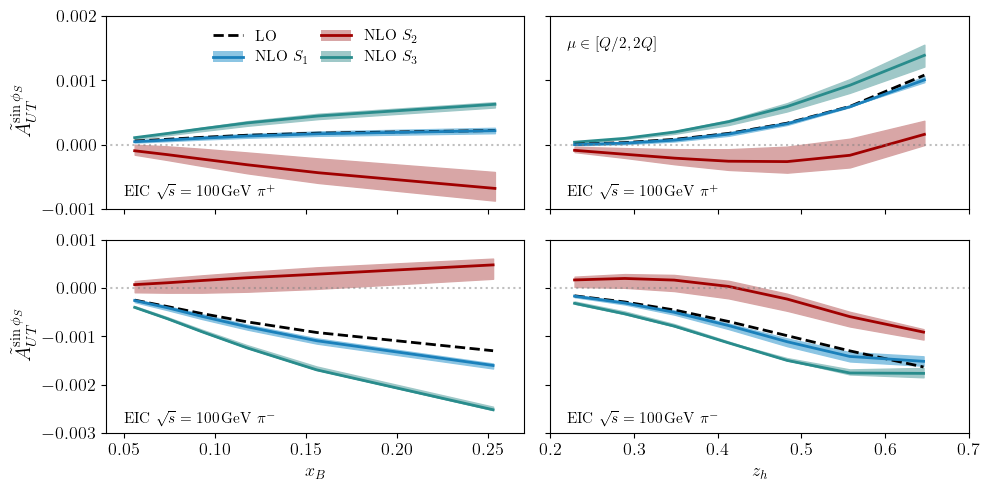

In [9]:
ids = [1,2,3]

dfxpNLO= list()
dfxmNLO= list()
dfzpNLO= list()
dfzmNLO= list()





#mycmap=["#003a7d","#008dff","#8acbff","#c701ff","#4ecb8d","#ff9d3a","#e08e8f","#d83034"]

mycmap=["#8cc5e3","#1a80bb","#d8a6a6","#a00000","#9fc8c8","#298c8c"]

for k in ids:

    fnamexp = 'out/run'+str(k)+'/AUTx_NLO_pp_EIC.txt'
    fnamexm = 'out/run'+str(k)+'/AUTx_NLO_pm_EIC.txt'
    fnamezp = 'out/run'+str(k)+'/AUTz_NLO_pp_EIC.txt'
    fnamezm = 'out/run'+str(k)+'/AUTz_NLO_pm_EIC.txt'

    dfxpNLO.append(pd.read_csv(fnamexp,header=None,sep=' ', decimal = '.',engine='python',skiprows = 1))
    dfxmNLO.append(pd.read_csv(fnamexm,header=None,sep=' ', decimal = '.',engine='python',skiprows = 1))
    dfzpNLO.append(pd.read_csv(fnamezp,header=None,sep=' ', decimal = '.',engine='python',skipfooter = 3))
    dfzmNLO.append(pd.read_csv(fnamezm,header=None,sep=' ', decimal = '.',engine='python',skipfooter = 3))


    


dfxp = pd.read_csv('out/AUTx_LO_pp_EIC.txt',header=None,sep=' ', decimal = '.',engine='python',skiprows = 1)
dfxm = pd.read_csv('out/AUTx_LO_pm_EIC.txt',header=None,sep=' ', decimal = '.',engine='python',skiprows = 1)
dfzp = pd.read_csv('out/AUTz_LO_pp_EIC.txt',header=None,sep=' ', decimal = '.',engine='python',skipfooter = 3)
dfzm = pd.read_csv('out/AUTz_LO_pm_EIC.txt',header=None,sep=' ', decimal = '.',engine='python',skipfooter = 3)



fs = 13
w = 10
h = 5


fig, axs = plt.subplots(2,2, figsize= (w,h),sharey='row',sharex='col')

#tl1 = '$s='+str(s) +'\\,\\rm{GeV}^2$\n'+'$y=' + str(y)+'$\n$z_h=' + str(zh[idx_zh]) + '$'
#tl2 = '$s='+str(s) +'\\,\\rm{GeV}^2$\n'+'$y=' + str(y)+'$\n$x_B=' + str(xB[idx_xB]) + '$'


#fig.suptitle("PRELIMINARY",color='r', fontsize=fs+5, bbox=dict(facecolor='w', edgecolor='k'))
#fig.subplots_adjust(top=.9) 

# xp

l1 =axs[0,0].plot(dfxp[0], dfxp[4], color='k',linestyle='dashed',   linewidth=2,zorder=90)
l2=axs[0,0].plot(dfxpNLO[0][0], dfxpNLO[0][4], color =mycmap[1],linestyle='solid',linewidth=2,alpha=1,zorder=100)
l2shade=axs[0,0].fill_between(dfxpNLO[0][0], dfxpNLO[0][4],dfxpNLO[0][5],color =mycmap[0],alpha=1)
axs[0,0].fill_between(dfxpNLO[0][0], dfxpNLO[0][4],dfxpNLO[0][6],color =mycmap[0],alpha=1)

l3=axs[0,0].plot(dfxpNLO[1][0], dfxpNLO[1][4], color =mycmap[3],linestyle='solid',linewidth=2,alpha=1)
l3shade=axs[0,0].fill_between(dfxpNLO[1][0], dfxpNLO[1][4],dfxpNLO[1][5],color =mycmap[2],alpha=1)
axs[0,0].fill_between(dfxpNLO[1][0], dfxpNLO[1][4],dfxpNLO[1][6],color =mycmap[2],alpha=1)


l4=axs[0,0].plot(dfxpNLO[2][0], dfxpNLO[2][4], color =mycmap[5],linestyle='solid',linewidth=2,alpha=1)
l4shade=axs[0,0].fill_between(dfxpNLO[2][0], dfxpNLO[2][4],dfxpNLO[2][5],color =mycmap[4],alpha=1)
axs[0,0].fill_between(dfxpNLO[2][0], dfxpNLO[2][4],dfxpNLO[2][6],color =mycmap[4],alpha=1)

#l5=axs[0,0].errorbar(meas_xp_x,meas_xp_value,meas_xp_dvalue, linestyle='none',fmt='d',mfc='w',mec='k',ecolor='k',ms=7, capsize=3, zorder=101)

# xm
axs[1,0].plot(dfxmNLO[0][0], dfxmNLO[0][4], color =mycmap[1] ,linestyle='solid',linewidth=2,alpha=1,zorder=100)
axs[1,0].fill_between(dfxmNLO[0][0], dfxmNLO[0][4],dfxmNLO[0][5],color =mycmap[0],alpha=1)
axs[1,0].fill_between(dfxmNLO[0][0], dfxmNLO[0][4],dfxmNLO[0][6],color =mycmap[0],alpha=1)

axs[1,0].plot(dfxmNLO[1][0], dfxmNLO[1][4], color =mycmap[3] ,linestyle='solid',linewidth=2,alpha=1)
axs[1,0].fill_between(dfxmNLO[1][0], dfxmNLO[1][4],dfxmNLO[1][5],color =mycmap[2],alpha=1)
axs[1,0].fill_between(dfxmNLO[1][0], dfxmNLO[1][4],dfxmNLO[1][6],color =mycmap[2],alpha=1)

axs[1,0].plot(dfxmNLO[2][0], dfxmNLO[2][4], color =mycmap[5] ,linestyle='solid',linewidth=2,alpha=1)
axs[1,0].fill_between(dfxmNLO[2][0], dfxmNLO[2][4],dfxmNLO[2][5],color =mycmap[4],alpha=1)
axs[1,0].fill_between(dfxmNLO[2][0], dfxmNLO[2][4],dfxmNLO[2][6],color =mycmap[4],alpha=1)

axs[1,0].plot(dfxm[0], dfxm[4], color='k',linestyle='dashed',linewidth=2)
#axs[1,0].errorbar(meas_xm_x,meas_xm_value,meas_xm_dvalue, linestyle='none',fmt='o',mfc='w',mec='k',ecolor='k',ms=6, capsize=3,zorder=101,label='HERMES $\\pi^-$')

#axs[0,0].set_xlabel('$x_B$', fontsize=fs)
axs[0,0].set_ylabel('$$\\tilde{A}_{UT}^{\\sin \\phi_S }$$', fontsize=fs+2)
axs[1,0].set_ylabel('$$\\tilde{A}_{UT}^{\\sin \\phi_S }$$', fontsize=fs+2)

# zp
axs[0,1].plot(dfzp[2], dfzp[4], color='k',linestyle='dashed',zorder=90,linewidth=2)
axs[0,1].plot(dfzpNLO[0][2], dfzpNLO[0][4], color = mycmap[1] ,linestyle='solid',linewidth=2,alpha=1,zorder=100)
axs[0,1].fill_between(dfzpNLO[0][2], dfzpNLO[0][4],dfzpNLO[0][5],color =mycmap[0],alpha=1)
axs[0,1].fill_between(dfzpNLO[0][2], dfzpNLO[0][4],dfzpNLO[0][6],color =mycmap[0],alpha=1)

axs[0,1].plot(dfzpNLO[1][2], dfzpNLO[1][4], color =mycmap[3] ,linestyle='solid',linewidth=2,alpha=1)
axs[0,1].fill_between(dfzpNLO[1][2], dfzpNLO[1][4],dfzpNLO[1][5],color =mycmap[2],alpha=1)
axs[0,1].fill_between(dfzpNLO[1][2], dfzpNLO[1][4],dfzpNLO[1][6],color =mycmap[2],alpha=1)

axs[0,1].plot(dfzpNLO[2][2], dfzpNLO[2][4], color =mycmap[5] ,linestyle='solid',linewidth=2,alpha=1)
axs[0,1].fill_between(dfzpNLO[2][2], dfzpNLO[2][4],dfzpNLO[2][5],color =mycmap[4],alpha=1)
axs[0,1].fill_between(dfzpNLO[2][2], dfzpNLO[2][4],dfzpNLO[2][6],color =mycmap[4],alpha=1)


#axs[0,1].errorbar(meas_zp_z,meas_zp_value,meas_zp_dvalue, linestyle='none',fmt='d',mfc='w',mec='k',ecolor='k',ms=7, capsize=3,zorder=101)

# zm
axs[1,1].plot(dfzmNLO[0][2], dfzmNLO[0][4], color = mycmap[1] ,linestyle='solid',linewidth=2,alpha=1,zorder=100)
axs[1,1].fill_between(dfzmNLO[0][2], dfzmNLO[0][4],dfzmNLO[0][5],color =mycmap[0],alpha=1)
axs[1,1].fill_between(dfzmNLO[0][2], dfzmNLO[0][4],dfzmNLO[0][6],color =mycmap[0],alpha=1)

axs[1,1].plot(dfzmNLO[1][2], dfzmNLO[1][4], color =mycmap[3],linestyle='solid',linewidth=2,alpha=1)
axs[1,1].fill_between(dfzmNLO[1][2], dfzmNLO[1][4],dfzmNLO[1][5],color =mycmap[2],alpha=1)
axs[1,1].fill_between(dfzmNLO[1][2], dfzmNLO[1][4],dfzmNLO[1][6],color =mycmap[2],alpha=1)

axs[1,1].plot(dfzmNLO[2][2], dfzmNLO[2][4], color =mycmap[5],linestyle='solid',linewidth=2,alpha=1)
axs[1,1].fill_between(dfzmNLO[2][2], dfzmNLO[2][4],dfzmNLO[2][5],color =mycmap[4],alpha=1)
axs[1,1].fill_between(dfzmNLO[2][2], dfzmNLO[2][4],dfzmNLO[2][6],color =mycmap[4],alpha=1)

axs[1,1].plot(dfzm[2], dfzm[4], color='k',linestyle='dashed',linewidth=2)
#axs[1,1].errorbar(meas_zm_z,meas_zm_value,meas_zm_dvalue, linestyle='none',fmt='o',mfc='w',mec='k',ecolor='k',ms=6, capsize=3,zorder=101)


axs[0,0].hlines(0.0, 0,1, color='grey',alpha=0.5,linestyle='dotted', zorder=+100)
axs[0,1].hlines(0.0, 0,1, color='grey',alpha=0.5,linestyle='dotted', zorder=+100)
axs[1,0].hlines(0.0, 0,1, color='grey',alpha=0.5,linestyle='dotted', zorder=+100)
axs[1,1].hlines(0.0, 0,1, color='grey',alpha=0.5,linestyle='dotted', zorder=+100)

axs[0,0].set_xlim(0.04 ,0.27)
axs[0,0].set_ylim(-0.001,0.002)
axs[1,0].set_xlim(0.04 ,0.27)
axs[1,0].set_ylim(-0.003,0.001)
axs[0,1].set_xlim(0.2 ,.7)
#axs[0,1].set_ylim(-0.02,0.04)
axs[1,1].set_xlim(0.2 ,.7)
#axs[1,1].set_ylim(-0.08,0.05)

axs[0,0].tick_params(axis='y', which='major', labelsize=fs) 
#axs[0,0].tick_params(axis='x', which='major', labelsize=0)
axs[1,0].tick_params(axis='both', which='major', labelsize=fs)  

#axs[0,1].tick_params(axis='both', which='major', labelsize=0)       
axs[1,1].tick_params(axis='both', which='major', labelsize=fs)  

axs[1,1].set_xlabel('$z_h$', fontsize=fs)

axs[1,0].set_xlabel('$x_B$', fontsize=fs)

#handles=[l1,(l2,l2shade),(l3,l3shade),(l4,l4shade),l5]
#labels = ['LO','NLO $S_1$','NLO $S_2$','NLO $S_3$','HERMES $\\pi^+$']

shadel2 = axs[0,0].fill(np.nan, np.nan, color=l2shade.get_facecolor(), linewidth=0.)
shadel3 = axs[0,0].fill(np.nan, np.nan, color=l3shade.get_facecolor(), linewidth=0.)
shadel4 = axs[0,0].fill(np.nan, np.nan, color=l4shade.get_facecolor(), linewidth=0.)

handles=[l1[0],(shadel2[0],l2[0]),(shadel3[0],l3[0]),(shadel4[0],l4[0])]
lbls = ['LO','NLO $S_1$','NLO $S_2$','NLO $S_3$']

axs[0,0].legend(handles,lbls,fancybox= True, framealpha=0., loc='upper center', fontsize = fs-2, ncol=2,columnspacing=.8)
#axs[1,0].legend(fancybox= True, framealpha=0., loc='lower left', fontsize = fs-2, ncol=1)

axs[0,1].text(0.22,0.0015,'$\\mu \\in [Q/2,2 Q]$',fontsize=fs-2)
axs[0,1].text(0.22,-0.0008,'EIC $\\sqrt{s}=100\\,\\rm{GeV}$ $\\pi^+$',fontsize=fs-2)
axs[0,0].text(0.05,-0.0008,'EIC $\\sqrt{s}=100\\,\\rm{GeV}$ $\\pi^+$',fontsize=fs-2)
axs[1,1].text(0.22,-0.0028,'EIC $\\sqrt{s}=100\\,\\rm{GeV}$ $\\pi^-$',fontsize=fs-2)
axs[1,0].text(0.05,-0.0028,'EIC $\\sqrt{s}=100\\,\\rm{GeV}$ $\\pi^-$',fontsize=fs-2)

#axs[0,1].legend(fancybox= True, framealpha=0., loc='best', fontsize = fs-3, ncol=1)
#axs[1,1].legend(fancybox= True, framealpha=0., loc='best', fontsize = fs-3, ncol=1)

plt.tight_layout()
plt.savefig('./out/EIC_A_UT_NLO.pdf', dpi=300, bbox_inches='tight')
plt.show()

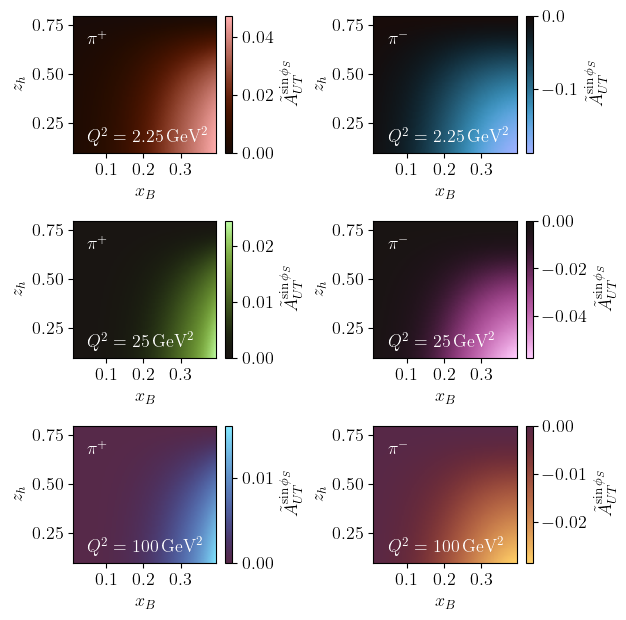

In [35]:
dfQ1pip = pd.read_csv('./out/AUTxz_LO_pp_Q1.txt',header=None,sep=' ', decimal = '.')
dfQ1pim = pd.read_csv('./out/AUTxz_LO_pm_Q1.txt',header=None,sep=' ', decimal = '.')
dfQ5pip = pd.read_csv('./out/AUTxz_LO_pp_Q5.txt',header=None,sep=' ', decimal = '.')
dfQ5pim = pd.read_csv('./out/AUTxz_LO_pm_Q5.txt',header=None,sep=' ', decimal = '.')
dfQ10pip = pd.read_csv('./out/AUTxz_LO_pp_Q10.txt',header=None,sep=' ', decimal = '.')
dfQ10pim = pd.read_csv('./out/AUTxz_LO_pm_Q10.txt',header=None,sep=' ', decimal = '.')

fs=13
w=6.3
h=6.3

txtQ1 = '$Q^2 = 2.25\\,\\textrm{GeV}^2$'
txtQ5 = '$Q^2 = 25\\,\\textrm{GeV}^2$'
txtQ10 = '$Q^2 = 100\\,\\textrm{GeV}^2$'
txtpip = '$\\pi^+$'
txtpim = '$\\pi^-$'


import cmasher as cmr

cmapQ1up = cmr.get_sub_cmap(plt.cm.berlin, 0.5, 1.0)
cmapQ1down = cmr.get_sub_cmap(plt.cm.berlin, 0, 0.5)
cmapQ5up = cmr.get_sub_cmap(plt.cm.vanimo, 0.5, 1.0)
cmapQ5down = cmr.get_sub_cmap(plt.cm.vanimo, 0, 0.5)
cmapQ10up = cmr.get_sub_cmap(plt.cm.managua, 0.5, 1.0)
cmapQ10down = cmr.get_sub_cmap(plt.cm.managua, 0, 0.5)

fig, axs = plt.subplots(3,2, figsize= (w,h))

pivot = dfQ1pip.pivot_table(index=0, columns=1, values=3, aggfunc='mean')
Xvals = pivot.index.values
Yvals = pivot.columns.values
Z = pivot.values
im=axs[0,0].imshow(Z,
        extent=[Xvals.min(), Xvals.max(), Yvals.min(), Yvals.max()],
        aspect='auto',
        cmap=cmapQ1up,vmin=0)
cb=fig.colorbar(im)
cb.ax.tick_params(labelsize=fs)
cb.set_label(label='$\\tilde{A}_{UT}^{\\sin\\phi_S}$',size=fs)
axs[0,0].tick_params(axis='x',labelsize=fs)
axs[0,0].tick_params(axis='y',labelsize=fs)       
#axs[0,0].set_aspect('equal','box')
axs[0,0].set_xlabel('$x_B$',fontsize=fs)
axs[0,0].set_ylabel('$z_h$',fontsize=fs)
#axs[0,0].set_xlim(0.01,0.39)
#axs[0,0].set_ylim(0.1,0.75)
axs[0,0].text(0.05,0.65,txtpip, color='w',fontsize=fs)
axs[0,0].text(0.05,0.15,txtQ1, color='w',fontsize=fs)

pivot = dfQ1pim.pivot_table(index=0, columns=1, values=3, aggfunc='mean')
Xvals = pivot.index.values
Yvals = pivot.columns.values
Z = pivot.values
im=axs[0,1].imshow(Z, aspect='auto',
        extent=[Xvals.min(), Xvals.max(), Yvals.min(), Yvals.max()],
        cmap=cmapQ1down,vmax=0)
cb=fig.colorbar(im)
cb.ax.tick_params(labelsize=fs)
cb.set_label(label='$\\tilde{A}_{UT}^{\\sin\\phi_S}$',size=fs)
axs[0,1].tick_params(axis='x',labelsize=fs)
axs[0,1].tick_params(axis='y',labelsize=fs)
axs[0,1].set_xlabel('$x_B$',fontsize=fs)
axs[0,1].set_ylabel('$z_h$',fontsize=fs)
#axs[0,1].set_xlim(0.1,0.79)
#axs[0,1].set_ylim(0.1,0.75)
axs[0,1].text(0.05,0.65,txtpim, color='w',fontsize=fs)
axs[0,1].text(0.05,0.15,txtQ1, color='w',fontsize=fs)


pivot = dfQ5pip.pivot_table(index=0, columns=1, values=3, aggfunc='mean')
Xvals = pivot.index.values
Yvals = pivot.columns.values
Z = pivot.values
im=axs[1,0].imshow(Z,
        extent=[Xvals.min(), Xvals.max(), Yvals.min(), Yvals.max()],
        aspect='auto',
        cmap=cmapQ5up,vmin=0)
cb=fig.colorbar(im)
cb.ax.tick_params(labelsize=fs)
cb.set_label(label='$\\tilde{A}_{UT}^{\\sin\\phi_S}$',size=fs)
axs[1,0].tick_params(axis='x',labelsize=fs)
axs[1,0].tick_params(axis='y',labelsize=fs)       
#axs[0,0].set_aspect('equal','box')
axs[1,0].set_xlabel('$x_B$',fontsize=fs)
axs[1,0].set_ylabel('$z_h$',fontsize=fs)
#axs[0,0].set_xlim(0.01,0.39)
#axs[0,0].set_ylim(0.1,0.75)
axs[1,0].text(0.05,0.65,txtpip, color='w',fontsize=fs)
axs[1,0].text(0.05,0.15,txtQ5, color='w',fontsize=fs)

pivot = dfQ5pim.pivot_table(index=0, columns=1, values=3, aggfunc='mean')
Xvals = pivot.index.values
Yvals = pivot.columns.values
Z = pivot.values
im=axs[1,1].imshow(Z, aspect='auto',
        extent=[Xvals.min(), Xvals.max(), Yvals.min(), Yvals.max()],
        cmap=cmapQ5down,vmax=0)
cb=fig.colorbar(im)
cb.ax.tick_params(labelsize=fs)
cb.set_label(label='$\\tilde{A}_{UT}^{\\sin\\phi_S}$',size=fs)
axs[1,1].tick_params(axis='x',labelsize=fs)
axs[1,1].tick_params(axis='y',labelsize=fs)
axs[1,1].set_xlabel('$x_B$',fontsize=fs)
axs[1,1].set_ylabel('$z_h$',fontsize=fs)
#axs[0,1].set_xlim(0.1,0.79)
#axs[0,1].set_ylim(0.1,0.75)
axs[1,1].text(0.05,0.65,txtpim, color='w',fontsize=fs)
axs[1,1].text(0.05,0.15,txtQ5, color='w',fontsize=fs)


pivot = dfQ10pip.pivot_table(index=0, columns=1, values=3, aggfunc='mean')
Xvals = pivot.index.values
Yvals = pivot.columns.values
Z = pivot.values
im=axs[2,0].imshow(Z,
        extent=[Xvals.min(), Xvals.max(), Yvals.min(), Yvals.max()],
        aspect='auto',
        cmap=cmapQ10up,vmin=0,)
cb=fig.colorbar(im)
cb.ax.tick_params(labelsize=fs)
cb.set_label(label='$\\tilde{A}_{UT}^{\\sin\\phi_S}$',size=fs)
axs[2,0].tick_params(axis='x',labelsize=fs)
axs[2,0].tick_params(axis='y',labelsize=fs)
#axs[0,0].set_aspect('equal','box')
axs[2,0].set_xlabel('$x_B$',fontsize=fs)
axs[2,0].set_ylabel('$z_h$',fontsize=fs)
#axs[0,0].set_xlim(0.01,0.39)
#axs[0,0].set_ylim(0.1,0.75)
axs[2,0].text(0.05,0.65,txtpip, color='w',fontsize=fs)
axs[2,0].text(0.05,0.15,txtQ10, color='w',fontsize=fs)

pivot = dfQ10pim.pivot_table(index=0, columns=1, values=3, aggfunc='mean')
Xvals = pivot.index.values
Yvals = pivot.columns.values
Z = pivot.values
im=axs[2,1].imshow(Z, aspect='auto',
        extent=[Xvals.min(), Xvals.max(), Yvals.min(), Yvals.max()],
        cmap=cmapQ10down,vmax=0)

cb=fig.colorbar(im)
cb.ax.tick_params(labelsize=fs)
cb.set_label(label='$\\tilde{A}_{UT}^{\\sin\\phi_S}$',size=fs)
axs[2,1].tick_params(axis='x',labelsize=fs)
axs[2,1].tick_params(axis='y',labelsize=fs)
axs[2,1].set_xlabel('$x_B$',fontsize=fs)
axs[2,1].set_ylabel('$z_h$',fontsize=fs)

#axs[2,1].set_ylabel('$z_h$',fontsize=fs)
#axs[0,1].set_xlim(0.1,0.79)
#axs[0,1].set_ylim(0.1,0.75)
axs[2,1].text(0.05,0.65,txtpim, color='w',fontsize=fs)
axs[2,1].text(0.05,0.15,txtQ10, color='w',fontsize=fs)


plt.tight_layout()
plt.savefig('./out/A_UT_2D.pdf', dpi=300, bbox_inches='tight')
plt.show()